In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1. Create Network

Construct the graph by reading the edges directly

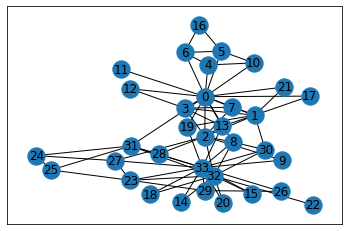

In [2]:
file_edge = './edges.csv'
edges = pd.read_csv(file_edge)
G = nx.from_pandas_edgelist(edges,'# source',' target',create_using=nx.Graph())
nx.draw_networkx(G)

In [3]:
# check whether graph is directed or undirected
print(G.is_directed())

False


## 2. Add node attributes

In [5]:
# reading CSV file "nodelist.csv"
nodes = pd.read_csv("nodelist.csv")

# Add the node attribute ""lub" info
nodes['club'] = nodes['club'].astype('category')
nx.set_node_attributes(G, nodes['club'], 'club')

# check data
G.nodes(data=True)

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 19: {'club': 'Mr. Hi'}, 21: {'club': 'Mr. Hi'}, 31: {'club': 'Officer'}, 30: {'club': 'Officer'}, 9: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 32: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 33: {'club': 'Officer'}, 23: {'club': 'Officer'}, 25: {'club': 'Officer'}, 29: {'club': 'Officer'}, 24: {'club': 'Officer'}, 26: {'club': 'Officer'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 18: {'club': 'Officer'}, 20: {'club': 'Officer'}, 22: {'club': 'Officer'}})

## 3. Assortativity

Comuting assortativity value based on the "club" attribute

In [6]:
from networkx.algorithms.assortativity import *
attribute_assortativity_coefficient(G,'club')

0.7135125993573483

In [7]:
attribute_mixing_matrix(G,'club',normalized=True)

array([[0.4025974 , 0.07142857],
       [0.07142857, 0.45454545]])

Players trained with Mr.Hi are more likely to connect with other players with Mr.Hi (assortativity = 0.4) rather than those trained with the officer (assortativity = 0.07), and vise versa. The relationship is very selective from both directions.

## 4. Local clustering coefficient

In [8]:
from networkx.algorithms import *
clustering(G)

{0: 0.15,
 1: 0.3333333333333333,
 2: 0.24444444444444444,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.5,
 6: 0.5,
 7: 1.0,
 8: 0.5,
 10: 0.6666666666666666,
 11: 0,
 12: 1.0,
 13: 0.6,
 17: 1.0,
 19: 0.3333333333333333,
 21: 1.0,
 31: 0.2,
 30: 0.5,
 9: 0,
 27: 0.16666666666666666,
 28: 0.3333333333333333,
 32: 0.18181818181818182,
 16: 1.0,
 33: 0.11666666666666667,
 23: 0.4,
 25: 0.3333333333333333,
 29: 0.6666666666666666,
 24: 0.3333333333333333,
 26: 1.0,
 14: 1.0,
 15: 1.0,
 18: 1.0,
 20: 1.0,
 22: 0}

In [9]:
# calculate local clustering coefficient of each node
local_clustering = clustering(G)

# add as an attribute to nodes
nx.set_node_attributes(G, local_clustering, 'local_clustering')

# view data
G.nodes(data=True)

NodeDataView({0: {'club': 'Mr. Hi', 'local_clustering': 0.15}, 1: {'club': 'Mr. Hi', 'local_clustering': 0.3333333333333333}, 2: {'club': 'Mr. Hi', 'local_clustering': 0.24444444444444444}, 3: {'club': 'Mr. Hi', 'local_clustering': 0.6666666666666666}, 4: {'club': 'Mr. Hi', 'local_clustering': 0.6666666666666666}, 5: {'club': 'Mr. Hi', 'local_clustering': 0.5}, 6: {'club': 'Mr. Hi', 'local_clustering': 0.5}, 7: {'club': 'Mr. Hi', 'local_clustering': 1.0}, 8: {'club': 'Mr. Hi', 'local_clustering': 0.5}, 10: {'club': 'Mr. Hi', 'local_clustering': 0.6666666666666666}, 11: {'club': 'Mr. Hi', 'local_clustering': 0}, 12: {'club': 'Mr. Hi', 'local_clustering': 1.0}, 13: {'club': 'Mr. Hi', 'local_clustering': 0.6}, 17: {'club': 'Mr. Hi', 'local_clustering': 1.0}, 19: {'club': 'Mr. Hi', 'local_clustering': 0.3333333333333333}, 21: {'club': 'Mr. Hi', 'local_clustering': 1.0}, 31: {'club': 'Officer', 'local_clustering': 0.2}, 30: {'club': 'Officer', 'local_clustering': 0.5}, 9: {'club': 'Officer'

## 5. Structural equivalence

### (1) Cosine similarity value

In [10]:
import numpy as np 
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
G_matrix = nx.to_numpy_matrix(G) #convert graph G to an adjacency matrix 
c_s = cosine_similarity(G_matrix) #compute consine similarlity for all pairs in the newtork 
c_s = c_s.tolist()
df_cosine = pd.DataFrame.from_records(c_s)

# remove diagonal value (same point)
for i in range(0,34):
    for j in range(0,34):
        if i==j:
            df_cosine[i][j]=0
            
print(df_cosine)

          0         1         2         3         4         5         6   \
0   0.000000  0.583333  0.395285  0.510310  0.288675  0.250000  0.250000   
1   0.583333  0.000000  0.421637  0.544331  0.192450  0.166667  0.166667   
2   0.395285  0.421637  0.000000  0.516398  0.182574  0.158114  0.158114   
3   0.510310  0.544331  0.516398  0.000000  0.235702  0.204124  0.204124   
4   0.288675  0.192450  0.182574  0.235702  0.000000  0.866025  0.288675   
5   0.250000  0.166667  0.158114  0.204124  0.866025  0.000000  0.500000   
6   0.250000  0.166667  0.158114  0.204124  0.288675  0.500000  0.000000   
7   0.375000  0.500000  0.474342  0.612372  0.288675  0.250000  0.250000   
8   0.111803  0.447214  0.282843  0.365148  0.258199  0.223607  0.223607   
9   0.288675  0.192450  0.182574  0.235702  0.333333  0.288675  0.866025   
10  0.000000  0.333333  0.316228  0.408248  0.577350  0.500000  0.500000   
11  0.176777  0.471405  0.447214  0.288675  0.408248  0.353553  0.353553   
12  0.335410

In [12]:
# calculate max of each row of DataFrame
pd.DataFrame.max(df_cosine)
pd.DataFrame.idxmax(df_cosine)

0     0.583333
1     0.583333
2     0.516398
3     0.612372
4     0.866025
5     0.866025
6     0.866025
7     0.894427
8     0.632456
9     0.866025
10    0.707107
11    0.707107
12    0.894427
13    1.000000
14    0.816497
15    1.000000
16    0.577350
17    0.707107
18    0.816497
19    0.707107
20    0.816497
21    0.649519
22    0.408248
23    0.649519
24    0.632456
25    0.577350
26    0.707107
27    0.516398
28    0.632456
29    1.000000
30    1.000000
31    1.000000
32    1.000000
33    0.707107
dtype: float64

0      1
1      0
2      3
3      7
4      5
5      4
6      9
7     12
8     18
9      6
10    11
11     7
12     7
13    15
14    13
15    13
16    29
17    29
18    20
19    18
20    18
21    23
22     4
23    21
24    28
25    19
26    29
27    24
28    24
29    30
30    29
31    29
32    29
33    29
dtype: int64

Identify the most similar pair: (13,15) (29,30) is the pairs with the highst cosine similarity.

### (2) Jaccard similarity value

In [13]:
Jaccard = list(nx.jaccard_coefficient(G))
max(Jaccard)

(30, 31, 0.25)

Identify the most similar pair: (30,31) is the pair with the highst Jaccard similarity.

## 6.  Plot degree centrality and local clustering coefficient

In [14]:
x_degree_centrality = list(nx.degree_centrality(G).values())
y_clustering = list(clustering(G).values())

Text(0.5, 0, 'Degree Centrality')

Text(0, 0.5, 'Local Clustering Coefficient')

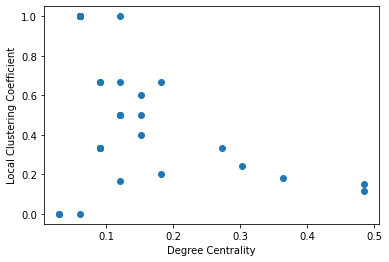

In [15]:
import matplotlib.pyplot as plt 
plt.scatter(x_degree_centrality, y_clustering)
plt.xlabel('Degree Centrality')
plt.ylabel('Local Clustering Coefficient')
#s=None, c=None, marker=None, cmap=None, alpha=None, linewidths=None, edgecolors=None)

 As observed in the graph, degree centriality is negatively correlated with local clustering coefficient.